In [4]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img


from tensorflow.keras.applications.xception import preprocess_input

In [2]:
!unzip ./xception_v1_26_0.785.h5.zip

Archive:  ./xception_v1_26_0.785.h5.zip
  inflating: xception_v1_26_0.785.h5  
  inflating: __MACOSX/._xception_v1_26_0.785.h5  


In [3]:
xcept_model = keras.models.load_model('xception_v1_26_0.785.h5')
mobilnet_model1 = keras.models.load_model('mobilenet_v1_08_0.766.h5')
mobilnet_model2 = keras.models.load_model('mobilent_v2_06_0.785.h5')

In [10]:
# Path of an image to make predictions
img_path = '/content/11124324295_503f3a0804.jpg'
# Load image
img = load_img(img_path, target_size=(150,150))
img2 = load_img(img_path, target_size=(160,160))

# Convert image to numpy array
x = np.array(img)
# Add batch dimension to the image
X = np.array([x])
# Preprocess the image
X = preprocess_input(X)

x1 = np.array(img2)
X1 = np.array([x1])
X1 = preprocess_input(X1)

In [16]:
pred = xcept_model.predict(X)
#pred1 = mobilnet_model1(X1)
#pred2 = mobilnet_model2(X1)

1/1 [==============================] - 0s 107ms/step


In [17]:
classes = ['daisy',
           'dandelion']

In [18]:
dict(zip(classes, pred[0]))

{'daisy': -0.058336973, 'dandelion': 1.4180559}

In [19]:
pred1 = mobilnet_model1(X1)
dict(zip(classes, pred1[0]))

{'daisy': <tf.Tensor: shape=(), dtype=float32, numpy=2.890086>,
 'dandelion': <tf.Tensor: shape=(), dtype=float32, numpy=0.6547673>}

In [27]:
pred2 = mobilnet_model2(X1)
dict(zip(classes, pred2.numpy()[0]))
# pred2.numpy()

{'daisy': 0.99886006, 'dandelion': -4.3132777}

In [60]:
!pip install tflite-runtime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 8.4 MB/s eta 0:00:00


In [28]:
converter = tf.lite.TFLiteConverter.from_keras_model(mobilnet_model2)
tflite_model = converter.convert()

with open('flower_classification.tflite', 'wb') as f_out:
  f_out.write(tflite_model)

In [68]:
from PIL import Image
import tflite_runtime.interpreter as tflite

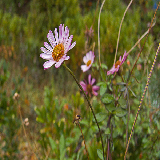

In [69]:
img = Image.open('/content/11124324295_503f3a0804.jpg')
img = img.resize((160,160),Image.NEAREST)
img

In [70]:
def preprocess_input(x):
  x /= 127.5
  x -= 1.0
  return x

In [71]:
x = np.array(img,dtype='float32')
X = np.array([x])
X = preprocess_input(X)

In [72]:
interpreter = tflite.Interpreter(model_path='flower_classification.tflite')
interpreter.allocate_tensors()


input_index = interpreter.get_input_details()[0]['index']
output_index = interpreter.get_output_details()[0]['index']

In [73]:
interpreter.set_tensor(input_index, X)
interpreter.invoke()
pred_lite = interpreter.get_tensor(output_index)
dict(zip(classes, pred_lite[0]))

{'daisy': 0.99885833, 'dandelion': -4.313273}